In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import RFECV



In [ ]:
data = pd.read_csv("/content/Student_Performance.csv")

In [ ]:
data.head()

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes          NaN   
1              4               82                         No          4.0   
2              8               51                        Yes          7.0   
3              5               52                        Yes          5.0   
4              7               75                         No          NaN   

   Sample Question Papers Practiced  Performance Index  
0                                 1                 91  
1                                 2                 65  
2                                 2                 45  
3                                 2                 36  
4                                 5                 66

In [ ]:
data.head()

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes          NaN   
1              4               82                         No          4.0   
2              8               51                        Yes          7.0   
3              5               52                        Yes          5.0   
4              7               75                         No          NaN   

   Sample Question Papers Practiced  Performance Index  
0                                 1                 91  
1                                 2                 65  
2                                 2                 45  
3                                 2                 36  
4                                 5                 66

In [ ]:
new_data = pd.get_dummies(data, drop_first=True)

In [ ]:
new_data.head()

Study Hours  Previous Score  Sleep Hours  Practiced Sample Paper Count  \
0            7              99     6.530206                             1   
1            4              82     4.000000                             2   
2            8              51     7.000000                             2   
3            5              52     5.000000                             2   
4            7              75     6.530206                             5   

   Score  Extracurricular Activities  
0     91                        True  
1     65                       False  
2     45                        True  
3     36                        True  
4     66                       False

In [ ]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         2
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
new_data.fillna(new_data.mean(), inplace=True)

In [ ]:
new_data.head()

Hours Studied  Previous Scores  Sleep Hours  \
0              7               99     6.530206   
1              4               82     4.000000   
2              8               51     7.000000   
3              5               52     5.000000   
4              7               75     6.530206   

   Sample Question Papers Practiced  Performance Index  \
0                                 1                 91   
1                                 2                 65   
2                                 2                 45   
3                                 2                 36   
4                                 5                 66   

   Extracurricular Activities_Yes  
0                            True  
1                           False  
2                            True  
3                            True  
4                           False

In [ ]:
print("Duplicate row count : ",new_data.duplicated().sum())

Duplicate row count :  0


In [ ]:
new_data.drop_duplicates(inplace=True)

In [ ]:
print("Duplicate row count : ",new_data.duplicated().sum())

Duplicate row count :  0


In [ ]:
new_data.columns = ["Study Hours", "Previous Score", "Sleep Hours", "Practiced Sample Paper Count", "Score", "Extracurricular Activities"]

In [ ]:
independent = new_data.drop("Score", axis=1)
dependent = new_data.iloc[:, 4]

In [ ]:
independent.head()

Study Hours  Previous Score  Sleep Hours  Practiced Sample Paper Count  \
0            7              99     6.530206                             1   
1            4              82     4.000000                             2   
2            8              51     7.000000                             2   
3            5              52     5.000000                             2   
4            7              75     6.530206                             5   

   Extracurricular Activities  
0                        True  
1                       False  
2                        True  
3                        True  
4                       False

In [ ]:
dependent.head()

0    91
1    65
2    45
3    36
4    66
Name: Score, dtype: int64

In [ ]:
new_data.describe()

Study Hours  Previous Score  Sleep Hours  Practiced Sample Paper Count  \
count  9873.000000     9873.000000  9873.000000                   9873.000000   
mean      4.992100       69.441102     6.531253                      4.583004   
std       2.589081       17.325601     1.697437                      2.867202   
min       1.000000       40.000000     4.000000                      0.000000   
25%       3.000000       54.000000     5.000000                      2.000000   
50%       5.000000       69.000000     7.000000                      5.000000   
75%       7.000000       85.000000     8.000000                      7.000000   
max       9.000000       99.000000     9.000000                      9.000000   

             Score  
count  9873.000000  
mean     55.216651  
std      19.208570  
min      10.000000  
25%      40.000000  
50%      55.000000  
75%      70.000000  
max     100.000000

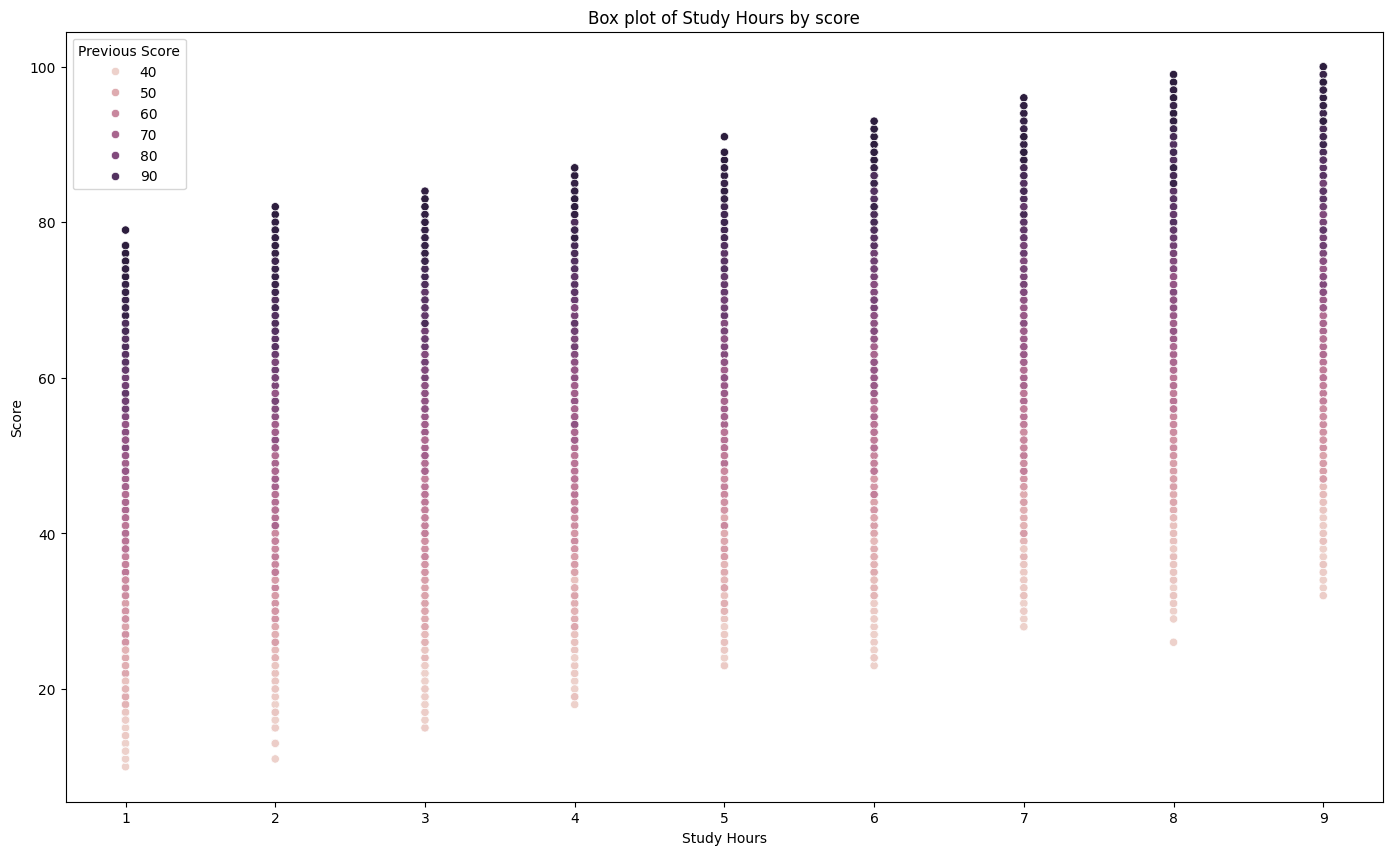

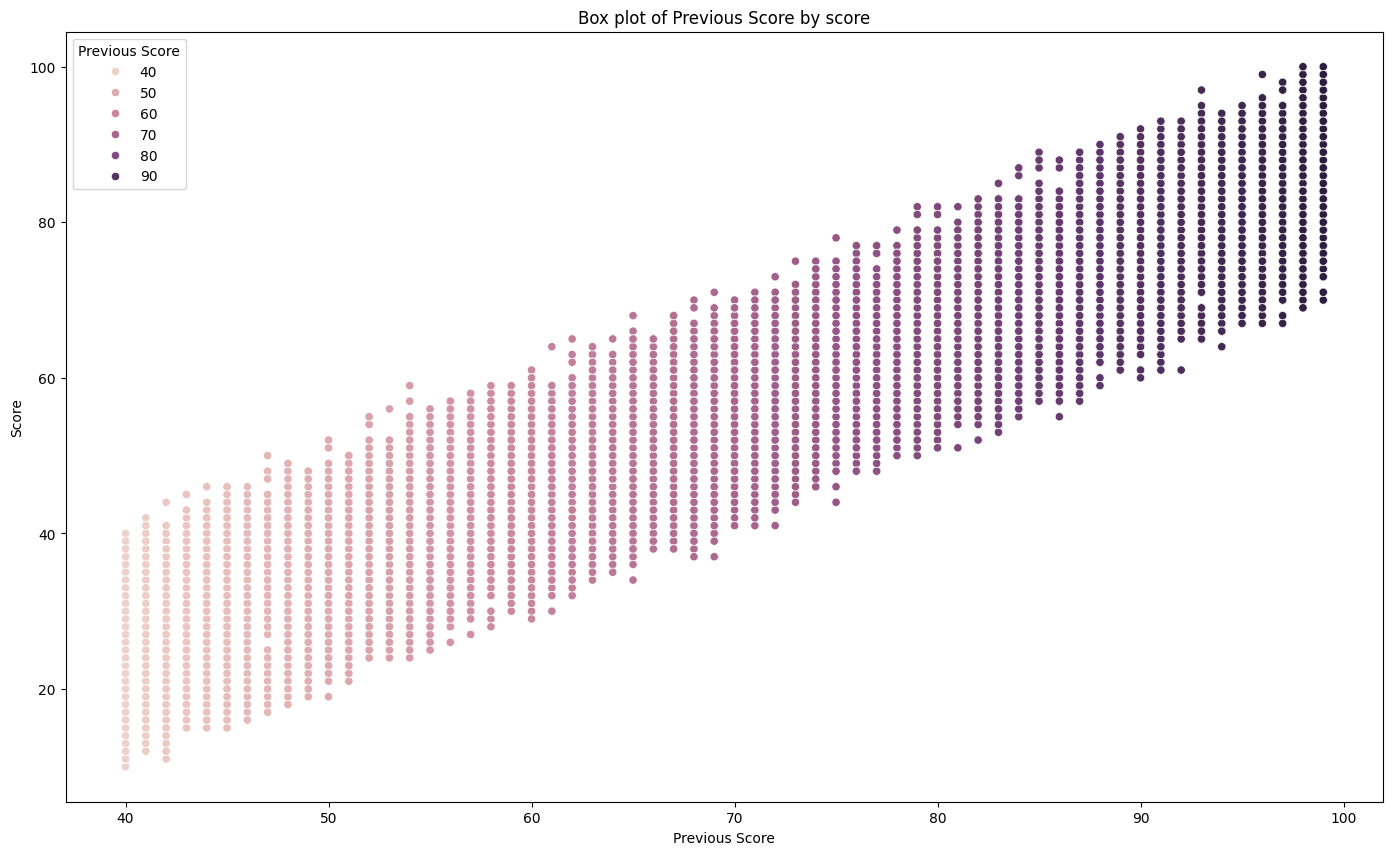

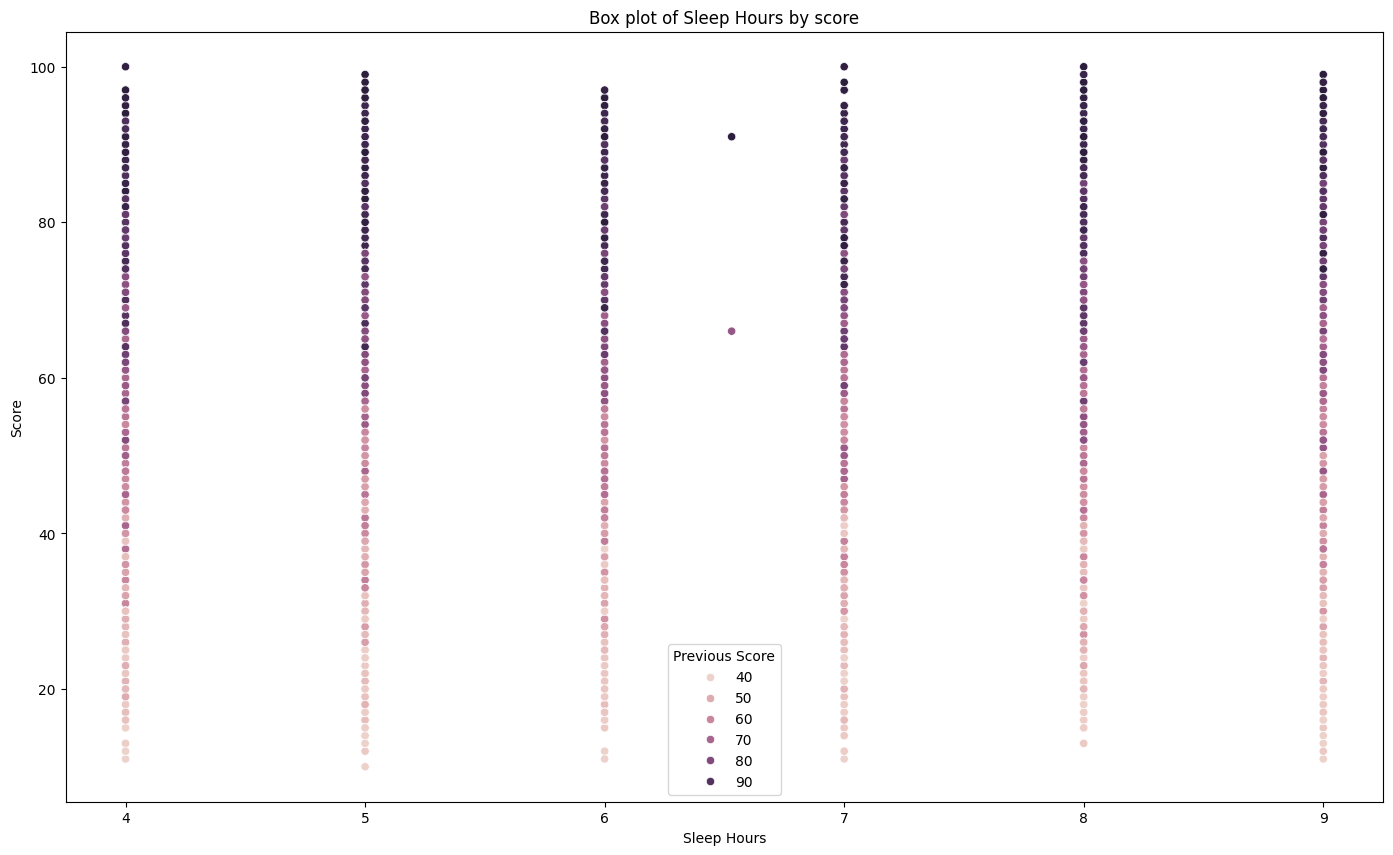

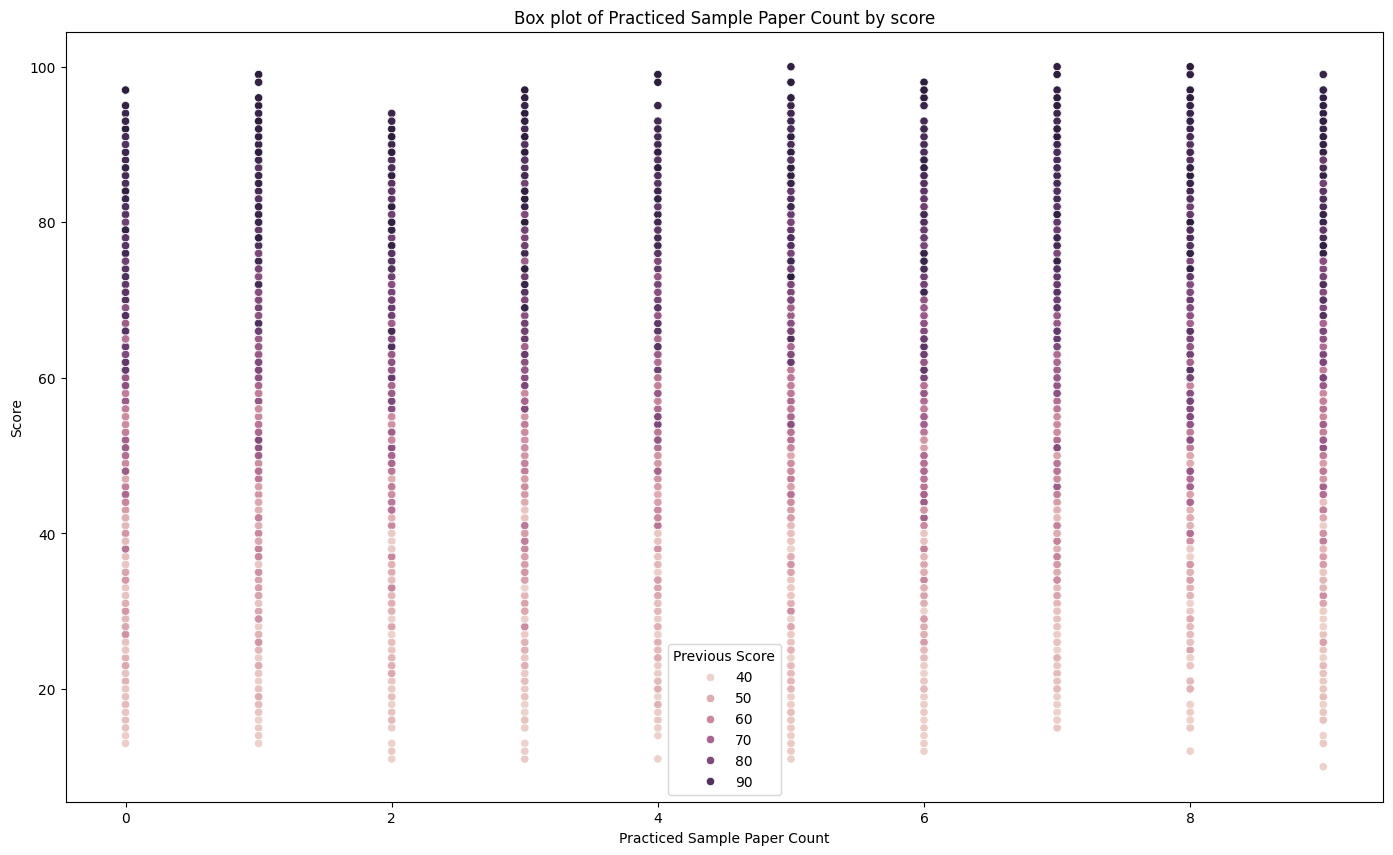

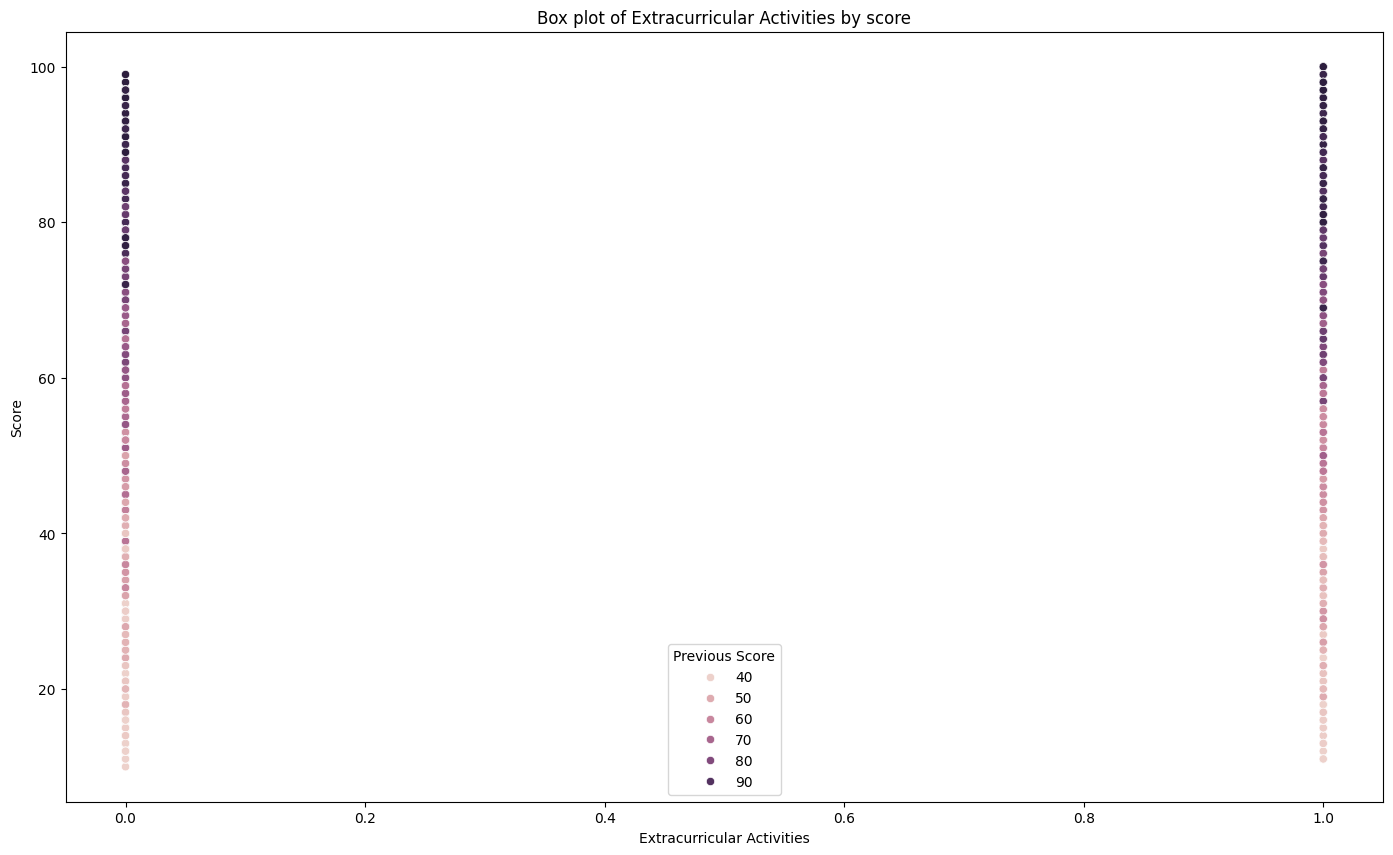

In [ ]:
for columns in independent.columns:
    plt.figure(figsize=(17,10))
    sns.scatterplot(x = columns, y = dependent, data = new_data, hue = "Previous Score")
    plt.title(f'Box plot of {columns} by score')
    plt.xlabel(columns)

    plt.ylabel("Score")
    plt.show()

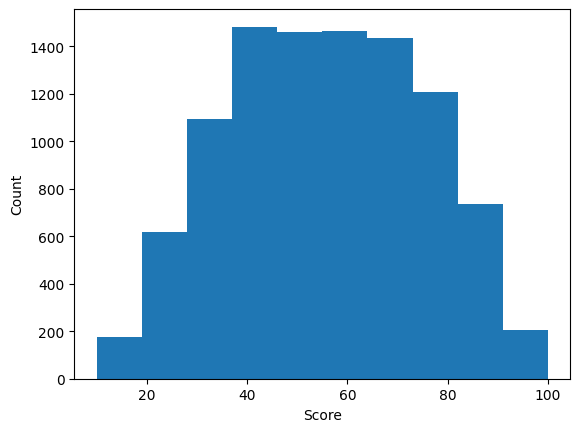

In [ ]:
plt.hist(dependent, bins=10)
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.2, random_state=0)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [ ]:
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [ ]:
print(f"Training MAE: {mae_train:.2f}, Testing MAE: {mae_test:.2f}")
print(f"Training MSE: {mse_train:.2f}, Testing MSE: {mse_test:.2f}")
print(f"Training R-squared: {r2_train:.2f}, Testing R-squared: {r2_test:.2f}")

Training MAE: 1.61, Testing MAE: 1.69
Training MSE: 4.10, Testing MSE: 4.49
Training R-squared: 0.99, Testing R-squared: 0.99


In [ ]:
RFE_CV = RFECV(estimator=model, min_features_to_select=1, cv=10)

In [ ]:
results = RFE_CV.fit(independent, dependent)

In [ ]:
results.support_

array([ True,  True,  True,  True,  True])

In [ ]:
selected_columns = independent.columns[results.support_]

In [ ]:
selected_columns

Index(['Study Hours', 'Previous Score', 'Sleep Hours',
       'Practiced Sample Paper Count', 'Extracurricular Activities'],
      dtype='object')

In [ ]:
parameters = {"alpha" : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [ ]:
lasso_model = Lasso()

In [ ]:
ridge_model = Ridge()

In [ ]:
grid_search_lasso = GridSearchCV(estimator=lasso_model, param_grid=parameters, cv = 10)
best_grid_param_lasso = grid_search_lasso.fit(independent, dependent)
print("Best parameters for Lasso (Grid search): ",best_grid_param_lasso.best_params_)

grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=parameters, cv = 10)
best_grid_param_ridge = grid_search_ridge.fit(independent, dependent)
print("Best parameters for Lasso (Grid search): ",best_grid_param_ridge.best_params_)

Best parameters for Lasso (Grid search):  {'alpha': 0.001}
Best parameters for Lasso (Grid search):  {'alpha': 1}


In [ ]:
random_search_lasso = RandomizedSearchCV(estimator=lasso_model, param_distributions=parameters, cv=10, n_iter=7)
best_params_lasso = random_search_lasso.fit(independent, dependent)
print("Best parameters for Lasso (Random search): ", best_params_lasso.best_params_)

random_search_ridge = RandomizedSearchCV(estimator=ridge_model, param_distributions=parameters, cv=10, n_iter=7)
best_params_ridge = random_search_ridge.fit(independent, dependent)
print("Best parameters for Ridge (Random search): ", best_params_ridge.best_params_)


Best parameters for Lasso (Random search):  {'alpha': 0.001}
Best parameters for Ridge (Random search):  {'alpha': 1}


In [ ]:
lasso = Lasso(alpha = 0.001)

In [ ]:
ridge = Ridge(alpha = 1)

In [ ]:
lasso.fit(x_train, y_train)

Lasso(alpha=0.001)

In [ ]:
ridge.fit(x_train, y_train)

Ridge(alpha=1)

In [ ]:
y_pred_ridge = ridge.predict(x_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression Mean Squared Error: {mse_ridge:.2f}")

Ridge Regression Mean Squared Error: 4.49


In [ ]:
y_pred_lasso = lasso.predict(x_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression Mean Squared Error: {mse_lasso:.2f}")

Lasso Regression Mean Squared Error: 4.49


In [ ]:
scores_1 = cross_val_score(model, independent, dependent,  cv= 5 , scoring='neg_mean_squared_error')

mse_scores = -scores_1

print("Cross-Validation Scores (MSE):", mse_scores)
print("Average Cross-Validation MSE:", mse_scores.mean())

Cross-Validation Scores (MSE): [4.19954754 4.17890463 3.97853574 4.22917841 4.31036621]
Average Cross-Validation MSE: 4.179306504798319


In [ ]:
scores_1 = cross_val_score(ridge, independent, dependent,  cv= 5 , scoring='neg_mean_squared_error')

mse_scores = -scores_1

print("Cross-Validation Scores (MSE):", mse_scores)
print("Average Cross-Validation MSE:", mse_scores.mean())

Cross-Validation Scores (MSE): [4.1995414  4.17892287 3.97854204 4.22916608 4.31035952]
Average Cross-Validation MSE: 4.179306381832535


In [ ]:
scores_lasso = cross_val_score(lasso, independent, dependent,  cv= 5 , scoring='neg_mean_squared_error')

mse_scores = -scores_1


print("Cross-Validation Scores (MSE):", mse_scores)
print("Average Cross-Validation MSE:", mse_scores.mean())

Cross-Validation Scores (MSE): [4.1995414  4.17892287 3.97854204 4.22916608 4.31035952]
Average Cross-Validation MSE: 4.179306381832535


In [ ]:
independent.columns

Index(['Study Hours', 'Previous Score', 'Sleep Hours',
       'Practiced Sample Paper Count', 'Extracurricular Activities'],
      dtype='object')

In [ ]:
new_student_sample_data = np.array([2, 90, 8, 1, False]).reshape(1, 5)

In [ ]:
prediction = model.predict(new_student_sample_data)
prediction_lasso = lasso.predict(new_student_sample_data)
prediction_ridge = ridge.predict(new_student_sample_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [ ]:
print("Student score :",prediction)
print("Student score _Lasso:",prediction_lasso)
print("Student score_Ridge :",prediction_ridge)

Student score : [67.30072125]
Student score : [67.30294502]
Student score : [67.30099898]
